# Chapter 4 - Bruining syndromic dataset

## Setup

Run Python file to import libraries and custom functions

In [1]:
%run libraries.py

/Users/joefarrington/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Set paths for data and results

In [4]:
data_path = '/Users/joefarrington/Documents/MSc Machine Learning/Project/August/Data for import/'
results_path = '/Users/joefarrington/Documents/MSc Machine Learning/Project/August/Results/Ch4B/'

Define a string to be added to the name of all saved results from this notebook

In [2]:
nbname = 'Ch4B'

Import the Bruining syndromic dataset

In [4]:
X_all = pd.read_csv(data_path+'X_all_B.csv', index_col=0)
y_all = np.array(pd.read_csv(data_path+'y_all_B.csv', index_col=0, header=None)).reshape(-1,)

Define an sklearn scorer object to calculate the Matthews Correlation Coefficient (MCC)

In [5]:
mcc_scorer = make_scorer(matthews_corrcoef)

Create a list that contains the labels, to use for labelling the axes of figures.

In [7]:
B_labels = np.unique(y_all)
B_labels[1] = 'DS'
B_labels

array(['22q11DS', 'DS', 'PW', 'SMC15', 'TSC', 'XXY'], dtype=object)

## Model 1: OvO SVM with RBF kernel

Define the number of train/test splits and the number of folds for cross-validation

In [6]:
n_repeats = 50
n_folds = 10

Define the model

In [135]:
svc_rbf = SVC(decision_function_shape='ovo', kernel='rbf')
steps_rbf = [('scaler', StandardScaler()),
     ('model',svc_rbf)]
pipeline_rbf = Pipeline(steps_rbf)

Define the parameters for the grid search

In [136]:
rbf_C_range = np.logspace(start=-5, stop=15, num=21, base=2)
rbf_gamma_range = np.logspace(start=-15, stop=3, num=19, base=2)
rbf_parameters = dict(model__gamma=rbf_gamma_range, model__C=rbf_C_range)

Run the evaluation procedure

In [137]:
svm_rbf_dict = repeated_training(X_all, y_all, n_repeats, n_folds, rbf_parameters, pipeline_rbf, mcc_scorer, verbose=1)

Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1553 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 0 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 1 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 2704 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 2 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 3 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 4 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 5 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 6 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 7 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 8 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 9 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 10 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 11 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 12 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 13 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 14 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 15 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 16 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 17 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 18 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 19 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 20 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 21 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 22 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 23 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 24 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 25 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 2704 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 26 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 27 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 28 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 29 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 30 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 2704 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 31 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 32 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 33 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 34 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 35 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 36 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 37 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 38 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 39 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 40 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 41 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 42 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 43 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 44 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 2704 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 45 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 46 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 47 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 48 completed
Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    9.9s


Run 49 completed
Mean test accuracy: 0.6166153846153847
Std dev test accuracy: 0.05119541399579833
Mean test MCC: 0.5093543899120835
Std dev test MCC: 0.06633490613503214


[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:   11.6s finished


Save the results

In [138]:
pickle.dump(svm_rbf_dict, open(results_path+f"svm_rbf_dict_{nbname}.p", "wb" ))

Load the results

In [8]:
svm_rbf_dict = pickle.load(open(results_path+f"svm_rbf_dict_{nbname}.p", "rb" ))

Plot a normalized confusion matrix

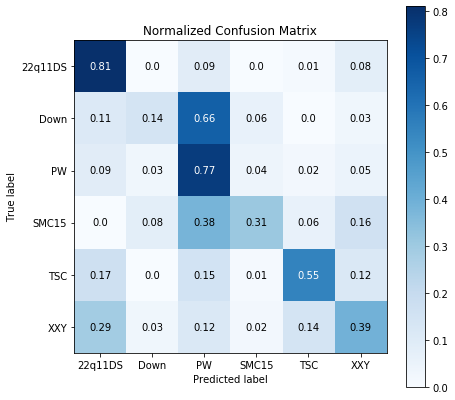

In [15]:
plot_confusion_matrix(svm_rbf_dict["cmdf"]["label"],svm_rbf_dict["cmdf"]["pred"], figsize=(7,7), normalize=True);

Print results

In [9]:
print_test_res(svm_rbf_dict, n_repeats)

Mean test accuracy: 0.6166153846153847
Std dev test accuracy: 0.05119541399579833
Mean test MCC: 0.5093543899120835
Std dev test MCC: 0.06633490613503214


## Model 2: OvO SVM with linear kernel

Define the number of train/test splits and the number of folds for cross-validation

In [141]:
n_repeats = 50
n_folds = 10

Define the model

In [142]:
svc_lin = SVC(decision_function_shape='ovo', kernel='linear')
steps_lin = [('scaler', StandardScaler()),
     ('model',svc_lin)]
pipeline_lin = Pipeline(steps_lin)

Define the parameters for the grid search

In [143]:
lin_C_range = np.logspace(start=-10, stop=10, num=21, base=2)
lin_parameters = dict(model__C=lin_C_range)

Run the evaluation procedure

In [144]:
svm_lin_dict = repeated_training(X_all, y_all, n_repeats, n_folds, lin_parameters, pipeline_lin, mcc_scorer, verbose=1)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 0 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 1 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 2 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 3 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 4 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 5 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 6 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 7 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 8 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 9 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 10 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 11 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 12 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 13 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 14 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 15 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 16 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 17 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 18 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 19 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 20 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 21 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 22 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 23 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 24 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 25 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 26 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 27 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 28 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 29 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 30 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 31 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 32 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 33 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 34 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 35 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 36 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 37 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 38 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 39 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 40 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 41 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 42 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 43 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 44 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 45 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 46 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 47 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Run 48 completed
Fitting 10 folds for each of 21 candidates, totalling 210 fits
Run 49 completed
Mean test accuracy: 0.5873846153846154
Std dev test accuracy: 0.042711638035418865
Mean test MCC: 0.4724019417065023
Std dev test MCC: 0.05573869868472622


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.6s finished


Save the results

In [145]:
pickle.dump(svm_lin_dict, open(results_path+f"svm_lin_dict_{nbname}.p", "wb" ))

Load the results

In [11]:
svm_lin_dict = pickle.load(open(results_path+f"svm_lin_dict_{nbname}.p", "rb" ))

Plot a normalized confusion matrix

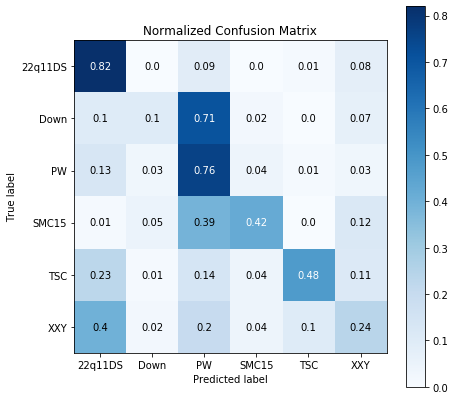

In [147]:
plot_confusion_matrix(svm_lin_dict["cmdf"]["label"],svm_lin_dict["cmdf"]["pred"], figsize=(7,7), normalize=True);

Print results

In [12]:
print_test_res(svm_lin_dict, n_repeats)

Mean test accuracy: 0.5873846153846154
Std dev test accuracy: 0.042711638035418865
Mean test MCC: 0.4724019417065023
Std dev test MCC: 0.05573869868472622


## Model 3: Naive Bayes (learn prior)

See '<b>Naive Bayes in R.ipynb</b>'

Load the results

In [6]:
NB_noprior = pd.read_csv(results_path+'B_noprior_allpreds.csv', index_col=0)

Plot a normalized confusion matrix

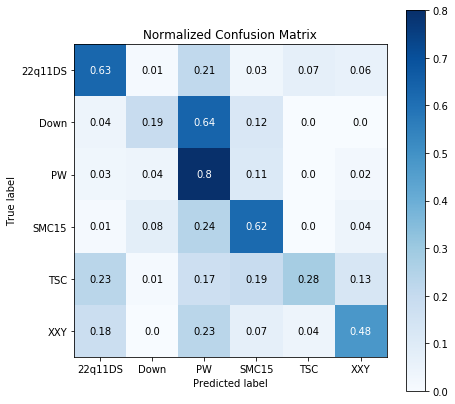

In [8]:
plot_confusion_matrix(NB_noprior['ytrue'],NB_noprior['ypred'], figsize=(7,7), normalize=True);

## Model 4: Naive Bayes (uniform prior) 

See '<b>Naive Bayes in R.ipynb</b>'

Load in the results

In [9]:
NB_uniprior = pd.read_csv(results_path+'B_uniprior_allpreds.csv', index_col=0)

Plot a normalized confusion matrix

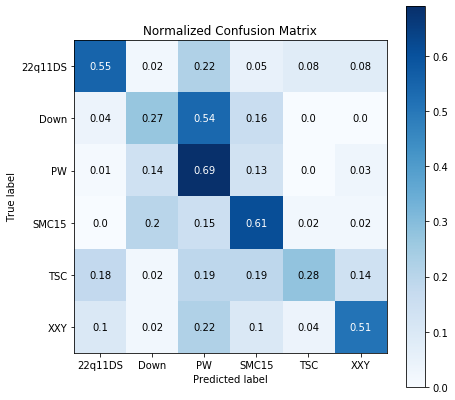

In [10]:
plot_confusion_matrix(NB_uniprior['ytrue'],NB_uniprior['ypred'], figsize=(7,7), normalize=True);

## Model 5: Standard Random Forest

Define the number of train/test splits and the number of folds for cross-validation

In [148]:
n_repeats = 50
n_folds = 10

Define the model

In [149]:
rfc_naive = RandomForestClassifier()

Define the parameters for the grid search

In [150]:
n_features = X_all.shape[1]
default_mtry = np.sqrt(n_features)
rfc_parameters = {'max_features': [int(0.5*default_mtry), int(default_mtry), int(1.5*default_mtry), int(2*default_mtry), int(3*default_mtry)],
             'n_estimators': [2000], 'min_samples_leaf': [1,2, 3, 4, 5]}

Run the evaluation procedure

In [151]:
rfc_naive_dict = repeated_training(X_all, y_all, n_repeats, n_folds, rfc_parameters, rfc_naive, mcc_scorer, verbose=1)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.5s
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.9min finished


Run 0 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 1 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 2 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 3 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 4 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 5 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 6 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 7 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 8 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 9 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 10 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 11 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 12 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 13 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 14 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 15 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 16 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 17 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 18 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 19 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 20 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 21 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 22 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 23 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 24 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 25 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 26 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 27 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 28 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 29 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 30 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 31 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 32 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 33 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 34 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 35 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 36 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 37 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 38 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 39 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 40 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 41 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 42 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 43 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 44 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 45 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 46 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 47 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 48 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


Run 49 completed
Mean test accuracy: 0.632
Std dev test accuracy: 0.05229321066502616
Mean test MCC: 0.5285821356056604
Std dev test MCC: 0.07091941494246015


Save the results

In [154]:
pickle.dump(rfc_naive_dict, open(results_path+f"rfc_naive_dict_{nbname}.p", "wb" ))

Load the results

In [13]:
rfc_naive_dict = pickle.load(open(results_path+f"rfc_naive_dict_{nbname}.p", "rb" ))

Plot a normalized confusion matrix

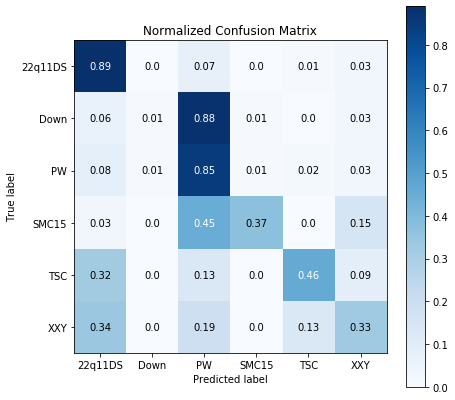

In [156]:
plot_confusion_matrix(rfc_naive_dict["cmdf"]["label"],rfc_naive_dict["cmdf"]["pred"], figsize=(7,7), normalize=True);

Print results

In [14]:
print_test_res(rfc_naive_dict, n_repeats)

Mean test accuracy: 0.632
Std dev test accuracy: 0.05229321066502616
Mean test MCC: 0.5285821356056604
Std dev test MCC: 0.07091941494246015


## Model 6: Balanced Random Forest

Define the number of train/test splits and the number of folds for cross-validation

In [157]:
n_repeats = 50
n_folds = 10

Define the model

In [158]:
rfc_bal = BalancedRandomForestClassifier()

Define the parameters for the grid search

In [159]:
n_features = X_all.shape[1]
default_mtry = np.sqrt(n_features)
rfc_parameters = {'max_features': [int(0.5*default_mtry), int(default_mtry), int(1.5*default_mtry), int(2*default_mtry), int(3*default_mtry)],
             'n_estimators': [2000], 'min_samples_leaf': [1,2, 3, 4, 5]}

Run the evaluation procedure

In [160]:
rfc_bal_dict = repeated_training(X_all, y_all, n_repeats, n_folds, rfc_parameters, rfc_bal, mcc_scorer, verbose=1)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.2min finished


Run 0 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.7min finished


Run 1 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.8min finished


Run 2 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.8min finished


Run 3 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.8min finished


Run 4 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 5 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 6 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 7 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 8 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 9 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 10 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 11 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 12 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 13 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 14 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 15 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 16 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 17 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 18 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 19 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 20 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 21 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 22 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 23 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 24 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 25 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 26 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 27 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 28 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 29 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 30 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 31 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Run 32 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 33 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.7min finished


Run 34 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.7min finished


Run 35 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 36 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 37 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 38 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 39 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 40 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.6min finished


Run 41 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 42 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 43 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 44 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 45 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.4min finished


Run 46 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.7min finished


Run 47 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.7min finished


Run 48 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.6min finished


Run 49 completed
Mean test accuracy: 0.568923076923077
Std dev test accuracy: 0.05360296732932679
Mean test MCC: 0.4833326860942981
Std dev test MCC: 0.06341547336643698


Save the results

In [161]:
pickle.dump(rfc_bal_dict, open(results_path+f"rfc_bal_dict_{nbname}.p", "wb" ))

Load the results

In [15]:
rfc_bal_dict = pickle.load(open(results_path+f"rfc_bal_dict_{nbname}.p", "rb" ))

Plot a normalized confusion matrix

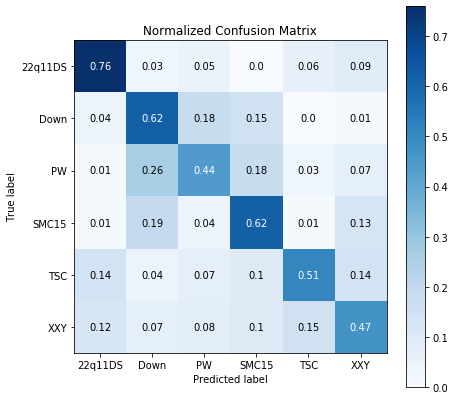

In [163]:
plot_confusion_matrix(rfc_bal_dict["cmdf"]["label"],rfc_bal_dict["cmdf"]["pred"], figsize=(7,7), normalize=True);

Print results

In [16]:
print_test_res(rfc_bal_dict, n_repeats)

Mean test accuracy: 0.568923076923077
Std dev test accuracy: 0.05360296732932679
Mean test MCC: 0.4833326860942981
Std dev test MCC: 0.06341547336643698


## Model 7: Weighted Random Forest

Define the number of train/test splits and the number of folds for cross-validation

In [164]:
n_repeats = 50
n_folds = 10

Define the model

In [165]:
rfc_weighted = RandomForestClassifier(class_weight = 'balanced_subsample')

Define the parameters for the grid search

In [166]:
n_features = X_all.shape[1]
default_mtry = np.sqrt(n_features)
rfc_parameters = {'max_features': [int(0.5*default_mtry), int(default_mtry), int(1.5*default_mtry), int(2*default_mtry), int(3*default_mtry)],
             'n_estimators': [2000], 'min_samples_leaf': [1,2, 3, 4, 5]}

Run the evaluation procedure

In [167]:
rfc_weighted_dict = repeated_training(X_all, y_all, n_repeats, n_folds, rfc_parameters, rfc_weighted, mcc_scorer, verbose=1)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.7min finished


Run 0 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.6min finished


Run 1 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.6min finished


Run 2 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.6min finished


Run 3 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.6min finished


Run 4 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 5 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 6 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 7 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 8 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 9 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 10 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 11 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 12 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 13 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 14 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 15 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 16 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 17 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 18 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 19 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 20 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 21 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 22 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 23 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 24 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 25 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 26 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 27 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 28 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 29 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 30 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 31 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 32 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 33 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 34 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 35 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 36 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 37 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 38 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 39 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 40 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 41 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 42 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 43 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.6min finished


Run 44 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 45 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.8min finished


Run 46 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.7min finished


Run 47 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 48 completed
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


Run 49 completed
Mean test accuracy: 0.628
Std dev test accuracy: 0.05246041054505972
Mean test MCC: 0.5270904738791259
Std dev test MCC: 0.06647739610407563


Save the results

In [168]:
pickle.dump(rfc_weighted_dict, open(results_path+f"rfc_weighted_dict_{nbname}.p", "wb" ))

Load the results

In [17]:
rfc_weighted_dict = pickle.load(open(results_path+f"rfc_weighted_dict_{nbname}.p", "rb" ))

Plot a normalized confusion matrix

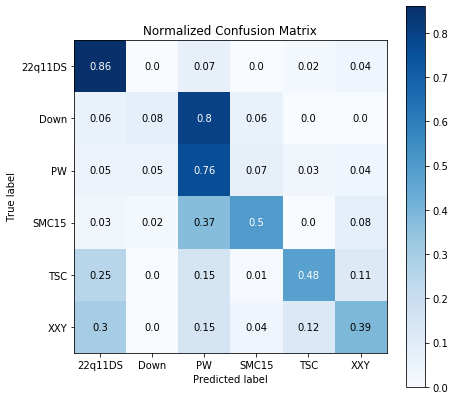

In [170]:
plot_confusion_matrix(rfc_weighted_dict["cmdf"]["label"],rfc_weighted_dict["cmdf"]["pred"], figsize=(7,7), normalize=True);

Print results

In [18]:
print_test_res(rfc_weighted_dict, n_repeats)

Mean test accuracy: 0.628
Std dev test accuracy: 0.05246041054505972
Mean test MCC: 0.5270904738791259
Std dev test MCC: 0.06647739610407563


## Plot confusion matrices for report

Define a path to save the plots

In [10]:
plot_path = '/Users/joefarrington/Documents/MSc Machine Learning/Project/August/Plots/Ch4B/'

### Plot confusion matrix for report: RBF SVM

Load in the results

In [90]:
svm_rbf_dict = pickle.load(open(results_path+f"svm_rbf_dict_{nbname}.p", "rb" ))

Plot and save the confusion matrix

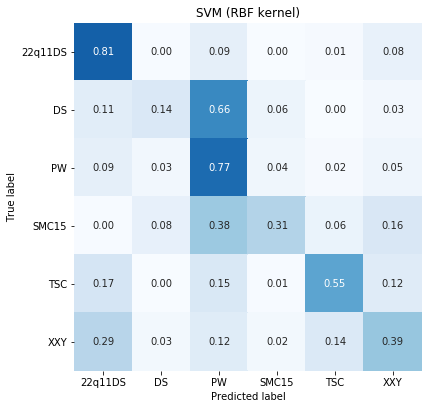

In [106]:
fig, ax = plt.subplots(figsize=(6,6))

plot_normalized_cm(svm_rbf_dict["cmdf"]["label"],svm_rbf_dict["cmdf"]["pred"], B_labels, ax=ax)
ax.set_yticklabels(labels = B_labels, rotation=0);
ax.set_title('SVM (RBF kernel)');
ax.set_ylabel('True label');
ax.set_xlabel('Predicted label');
plt.tight_layout()

plt.savefig(plot_path+'B_RBFSVM_CM.png')

### Plot confusion matrix for report: Linear SVM and NB models

Load in the results

In [98]:
svm_lin_dict = pickle.load(open(results_path+f"svm_lin_dict_{nbname}.p", "rb" ))

In [99]:
NB_noprior = pd.read_csv(results_path+'B_noprior_allpreds.csv', index_col=0)

In [100]:
NB_uniprior = pd.read_csv(results_path+'B_uniprior_allpreds.csv', index_col=0)

Plot and save the confusion matrices

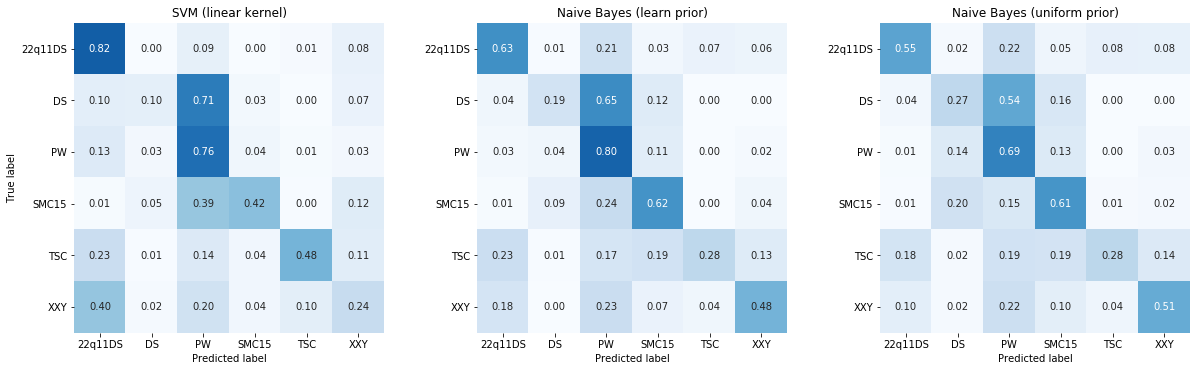

In [117]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,6))

plot_normalized_cm(svm_lin_dict["cmdf"]["label"],svm_lin_dict["cmdf"]["pred"], B_labels, ax=ax1)
ax1.set_yticklabels(labels = B_labels, rotation=0);
ax1.set_title('SVM (linear kernel)');
ax1.set_ylabel('True label');
ax1.set_xlabel('Predicted label');

plot_normalized_cm(NB_noprior['ytrue'],NB_noprior['ypred'], B_labels, ax=ax2)
ax2.set_yticklabels(labels = B_labels, rotation=0);
ax2.set_title('Naive Bayes (learn prior)');
ax2.set_xlabel('Predicted label');

plot_normalized_cm(NB_uniprior['ytrue'],NB_uniprior['ypred'], B_labels, ax=ax3)
ax3.set_yticklabels(labels = B_labels, rotation=0);
ax3.set_title('Naive Bayes (uniform prior)');
ax3.set_xlabel('Predicted label');

plt.subplots_adjust(wspace=0.3)

plt.savefig(plot_path+'B_simple_CM.png')

### Plot confusion matrix for report: all three RFs together

Load in the results

In [11]:
rfc_naive_dict = pickle.load(open(results_path+f"rfc_naive_dict_{nbname}.p", "rb" ))
rfc_bal_dict = pickle.load(open(results_path+f"rfc_bal_dict_{nbname}.p", "rb" ))
rfc_weighted_dict = pickle.load(open(results_path+f"rfc_weighted_dict_{nbname}.p", "rb" ))

Plot and save the confusion matrices

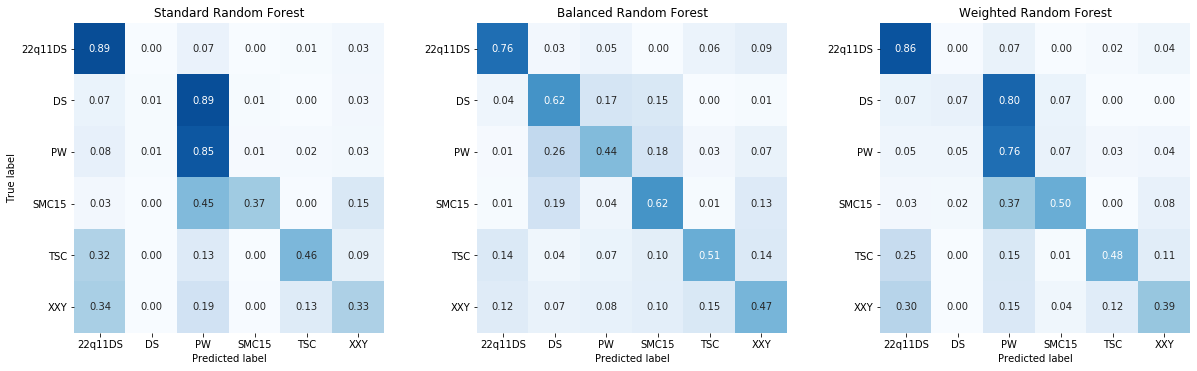

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,6))

plot_normalized_cm(rfc_naive_dict["cmdf"]["label"],rfc_naive_dict["cmdf"]["pred"], B_labels, ax=ax1)
ax1.set_yticklabels(labels = B_labels, rotation=0);
ax1.set_title('Standard Random Forest');
ax1.set_ylabel('True label');
ax1.set_xlabel('Predicted label');

plot_normalized_cm(rfc_bal_dict["cmdf"]["label"],rfc_bal_dict["cmdf"]["pred"], B_labels, ax=ax2)
ax2.set_yticklabels(labels = B_labels, rotation=0);
ax2.set_title('Balanced Random Forest');
ax2.set_xlabel('Predicted label');

plot_normalized_cm(rfc_weighted_dict["cmdf"]["label"],rfc_weighted_dict["cmdf"]["pred"], B_labels, ax=ax3)
ax3.set_yticklabels(labels = B_labels, rotation=0);
ax3.set_title('Weighted Random Forest');
ax3.set_xlabel('Predicted label');

plt.subplots_adjust(wspace=0.3)

plt.savefig(plot_path+'B_RFs_CM.png')